In [91]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [92]:
df = pd.DataFrame()

In [93]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [94]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

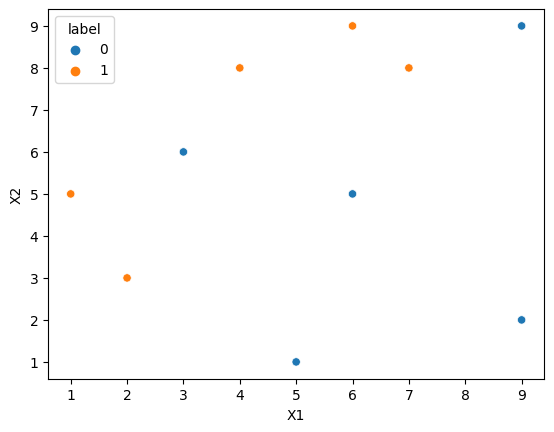

In [95]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue = df['label'])

In [96]:
df['weight'] = 1/df.shape[0]

In [97]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [98]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [99]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,2].values

In [100]:
# Training first Decision Tree
dt1.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

In [101]:
dt1.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 1,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 2,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 2,
 'tree_': <sklearn.tree._tree.Tree at 0x7f0adf95c570>}

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

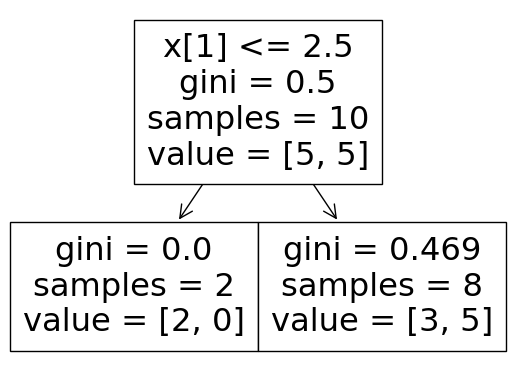

In [102]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

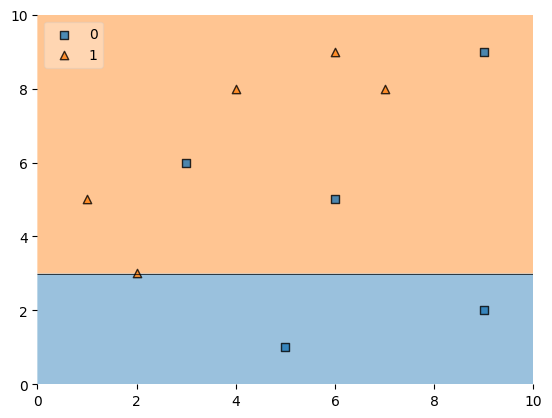

In [103]:
plot_decision_regions(X,Y,clf=dt1,legend=2)

In [104]:
df['Y_pred'] = dt1.predict(X)

In [105]:
df

,X1,X2,label,weight,Y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [106]:
def calculated_model_weight(error):
    return 0.5*np.log((1-error)/(error+0.00000000004)) # adding to avoid error = 0, case

In [107]:
# Step 3
# calculate model weight
# miscalissi=fication at three rows = 2,6,8 total error = 0.1 + 0.1 + 0.1 for misclassification
alpha1 = calculated_model_weight(0.3)
alpha1

0.42364893019360184

In [108]:
# Step 4 
# Updated Weight
def updated_row_weights(row,alpha=0.423):
    if row['label'] == row['Y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [109]:
df['Updated_Weight'] = df.apply(updated_row_weights,axis=1)

In [110]:
df

,X1,X2,label,weight,Y_pred,Updated_Weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [111]:
df['Normalized_Weights'] = df['Updated_Weight']/df['Updated_Weight'].sum()

In [112]:
df

,X1,X2,label,weight,Y_pred,Updated_Weight,Normalized_Weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [113]:
df['weight'].sum()

1.0

In [114]:
df['Updated_Weight'].sum()

0.9165153319682015

In [115]:
df['Normalized_Weights'].sum()

1.0

In [116]:
# uses desmos for graph visualization.

df['cumsum_upper'] = np.cumsum(df['Normalized_Weights'])

In [117]:
df['cumsum_lower'] = df['cumsum_upper'] - df['Normalized_Weights']

In [118]:
df[['X1','X2','label','weight','Y_pred','Updated_Weight','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,Y_pred,Updated_Weight,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [119]:
# Up Sampling
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [120]:
index_values = create_new_dataset(df)
index_values

[5, 3, 7, 1, 8, 2, 3, 8, 7, 2]

In [121]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weight
5,6,9,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1


In [122]:
dt2 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
Y = second_df.iloc[:,-2].values

In [123]:
dt2.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

In [124]:
dt2.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 1,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 2,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 2,
 'tree_': <sklearn.tree._tree.Tree at 0x7f0adf95dbc0>}

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

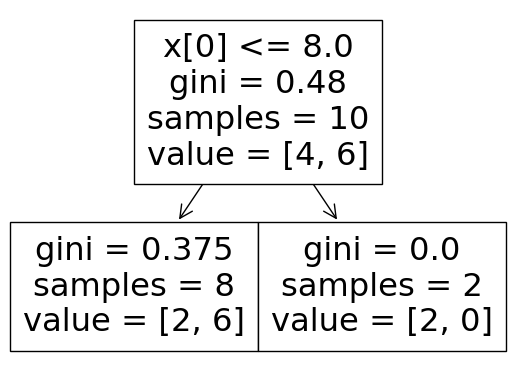

In [125]:
plot_tree(dt2)

<Axes: >

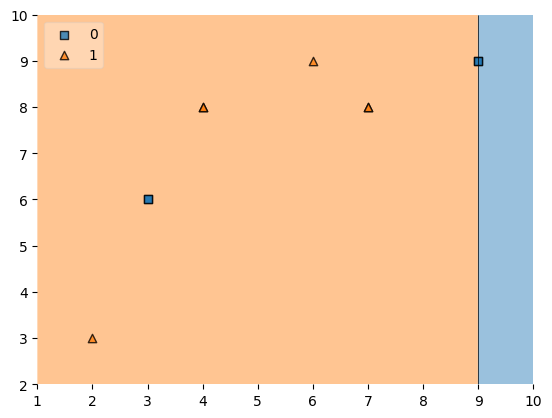

In [126]:
plot_decision_regions(X,Y,clf=dt2,legend=2)

In [127]:
second_df['Y_pred'] = dt2.predict(X)

In [128]:
second_df

,X1,X2,label,weight,Y_pred
5,6,9,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,0
2,3,6,0,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,0
7,7,8,1,0.1,1
2,3,6,0,0.1,1


In [129]:
alpha2 = calculated_model_weight(0.2) # id = 2  and since two times
alpha2

0.6931471805599453

In [132]:
def updated_row_weights(row,alpha=0.69):
    if row['label'] == row['Y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [133]:
second_df['updated_weight'] = second_df.apply(updated_row_weights,axis=1)

In [134]:
second_df

,X1,X2,label,weight,Y_pred,updated_weight
5,6,9,1,0.1,1,0.050158
3,4,8,1,0.1,1,0.050158
7,7,8,1,0.1,1,0.050158
1,2,3,1,0.1,1,0.050158
8,9,9,0,0.1,0,0.050158
2,3,6,0,0.1,1,0.199372
3,4,8,1,0.1,1,0.050158
8,9,9,0,0.1,0,0.050158
7,7,8,1,0.1,1,0.050158
2,3,6,0,0.1,1,0.199372


In [135]:
second_df['normalized_weight'] = second_df['updated_weight']/second_df['updated_weight'].sum()

In [136]:
second_df

,X1,X2,label,weight,Y_pred,updated_weight,normalized_weight
5,6,9,1,0.1,1,0.050158,0.062697
3,4,8,1,0.1,1,0.050158,0.062697
7,7,8,1,0.1,1,0.050158,0.062697
1,2,3,1,0.1,1,0.050158,0.062697
8,9,9,0,0.1,0,0.050158,0.062697
2,3,6,0,0.1,1,0.199372,0.249213
3,4,8,1,0.1,1,0.050158,0.062697
8,9,9,0,0.1,0,0.050158,0.062697
7,7,8,1,0.1,1,0.050158,0.062697
2,3,6,0,0.1,1,0.199372,0.249213


In [137]:
second_df['normalized_weight'].sum()

1.0

In [140]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weight'])

In [141]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weight']

In [143]:
second_df[['X1','X2','label','weight','Y_pred','updated_weight','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,Y_pred,updated_weight,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.050158,0.000000,0.062697
3,4,8,1,0.1,1,0.050158,0.062697,0.125393
7,7,8,1,0.1,1,0.050158,0.125393,0.188090
1,2,3,1,0.1,1,0.050158,0.188090,0.250787
8,9,9,0,0.1,0,0.050158,0.250787,0.313483
2,3,6,0,0.1,1,0.199372,0.313483,0.562697
3,4,8,1,0.1,1,0.050158,0.562697,0.625393
8,9,9,0,0.1,0,0.050158,0.625393,0.688090
7,7,8,1,0.1,1,0.050158,0.688090,0.750787
2,3,6,0,0.1,1,0.199372,0.750787,1.000000


In [144]:
index_values = create_new_dataset(second_df)

In [145]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [146]:
third_df

,X1,X2,label,weight
1,2,3,1,0.1
7,7,8,1,0.1
1,2,3,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1


In [147]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = third_df.iloc[:,0:2].values
Y = third_df.iloc[:,2].values

In [150]:
dt3.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

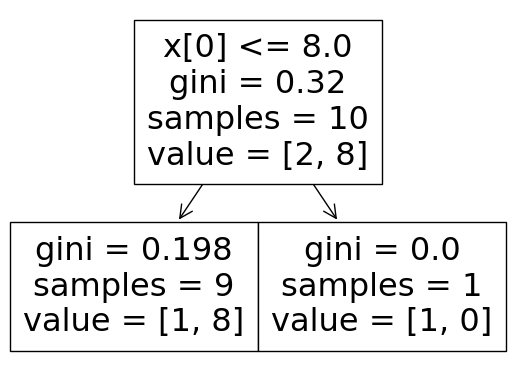

In [151]:
plot_tree(dt3)

<Axes: >

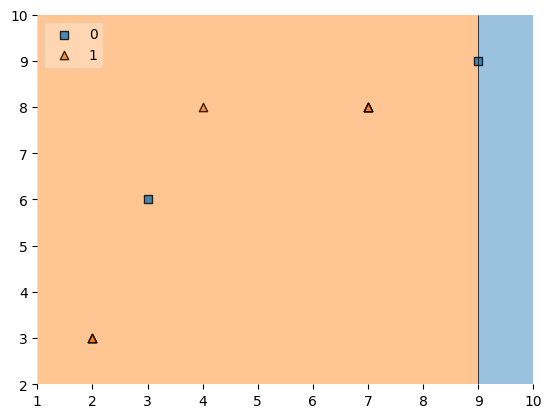

In [152]:
plot_decision_regions(X,Y,clf=dt3,legend=2)

In [153]:
third_df['Y_pred']=dt3.predict(X)

In [154]:
third_df

,X1,X2,label,weight,Y_pred
1,2,3,1,0.1,1
7,7,8,1,0.1,1
1,2,3,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
2,3,6,0,0.1,1
7,7,8,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,0
7,7,8,1,0.1,1


In [156]:
alpha3 = calculated_model_weight(0.1)
alpha3

1.0986122886681098

In [157]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 1.0986122886681098


## Prediction

In [158]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [159]:
dt2.predict(query)

array([1])

In [160]:
dt3.predict(query)

array([1])

In [161]:
h = alpha1*(1) + alpha2*(1) + alpha3*(1)

In [162]:
h

2.2154083994216567

In [163]:
np.sign(h) # it is true for outcome it should be true.

1.0

In [164]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [165]:
dt2.predict(query)

array([0])

In [166]:
dt3.predict(query)

array([0])

In [168]:
h = alpha1*(1) + alpha2*(-1) + alpha3*(-1) 
# 1 for 1 and -1 for 0

In [169]:
h

-1.3681105390344532

In [171]:
np.sign(h) # hence it belong to 0 class.

-1.0